---
# Liner Regression
---

<div>
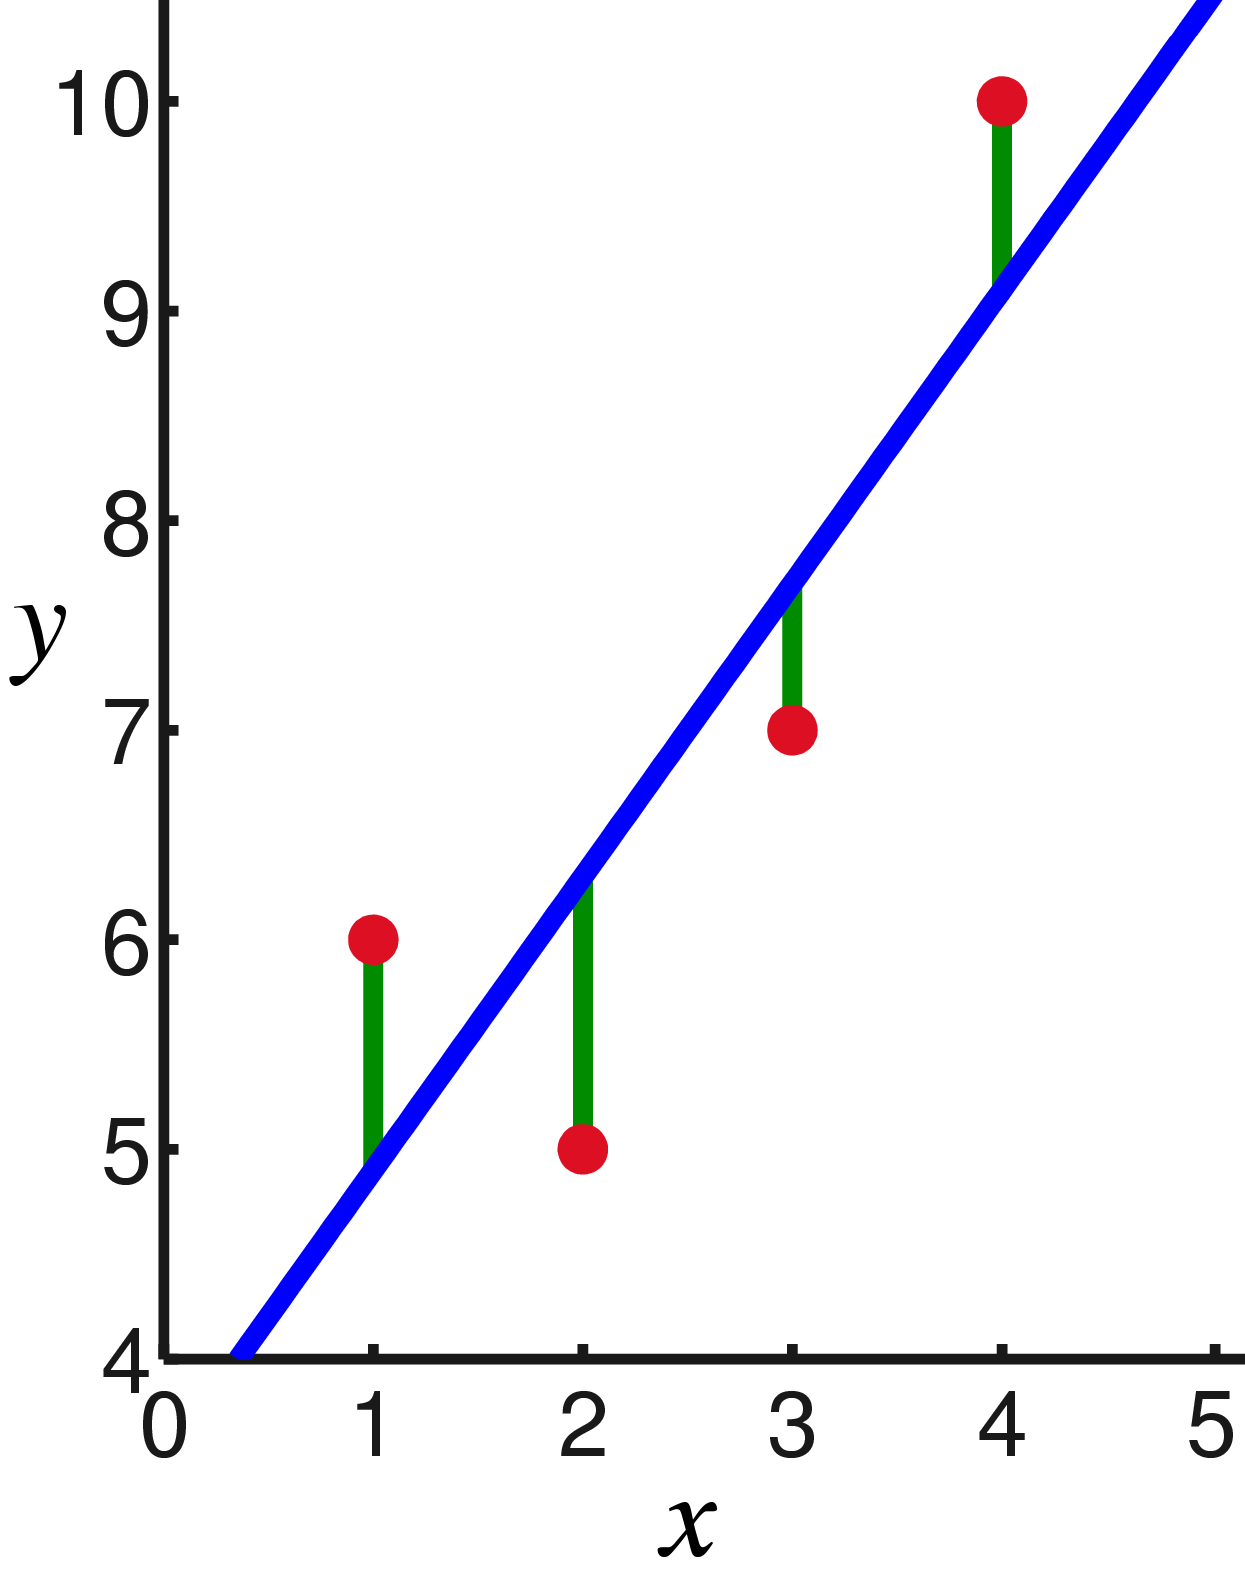
<div>

## Introduction

Linear regression is a powerful and widely used statistical technique for modeling and analyzing data. It is a method for finding the linear relationship between a dependent variable (also known as the response variable) and one or more independent variables (also known as explanatory variables or predictors).

The basic idea behind linear regression is to fit a line to the data that best captures the relationship between the dependent variable and the independent variables. This line can then be used to make predictions about the dependent variable based on the values of the independent variables.

There are usually two types of regression: simple linear and multiple linear regressions. This notebook focus on multiple linear regression. 



## Equation

$ y=\theta_0+\theta_1x_1+\theta_2x_2+...+\theta_nx_n$

- $\hat{y}$ is the predicted value.
- $n$ is the number of features.
- $x_i$ is the $i^{th}$ feature value.
- $\theta_j$ is the $j^{th}$ model parameter (including the bias term $\theta_0$ and the feature weights $\theta_1, \theta_2, ⋯, \theta_n$).

Often Equation 1 is written in a matrix form:  \
$\hat{y}=h_{\theta}(x)=\theta^T\cdot x$

- $\theta$ is the model’s parameter vector, containing the bias term $\theta_0$ and the feature weights $\theta_1$ to $\theta_n$.
- $x$ is the instance’s feature vector, containing $x_0$ to $x_n$, with $x_0$ always equal to 1.
- $h_\theta$ is the hypothesis function, using the model parameters $\theta$.

## Criterion/ Cost Function

To measure of how well the model fits the training data, the most common performance measure of a regression model is the Mean Square Error (MSE). Therefore, to train a Linear Regression model, you need to find the value of θ that minimizes the MSE. 
The MSE of a Linear Regression hypothesis hθ on a training set X is calculated using Equation 3.

- MSE cost function for a Linear Regression model 
$$\\ MSE(X, h_\theta) = \frac{1}{m} \sum_{i=1}^{m} (\theta^T \cdot x^{(i)} - y^{(i)})^2$$

- Normal Equation

By caculation, a mathematical equation that gives the result directly. This is called the Normal Equation 
$$\\ \hat{\theta} = (X^T \cdot X)^T \cdot X^T \cdot y$$

- $\hat{\theta}$ is the value of $\theta$ that minimizes the cost function. 
- $y = (y^{(1)}, ...,  y^{(m)})$.

## Evaluation

There are several metrics that can be used to evaluate the performance of a linear regression model. Here are some commonly used ones:

R-squared (R²): This metric measures how well the model fits the data. R² values range from 0 to 1, with 1 indicating a perfect fit. Higher R² values indicate better model performance.

Mean Squared Error (MSE): This metric measures the average squared difference between the predicted values and the actual values. Lower MSE values indicate better model performance.

Root Mean Squared Error (RMSE): This metric is the square root of the MSE and measures the average difference between the predicted values and the actual values. Lower RMSE values indicate better model performance.




---
## Applications on data sets

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [2]:
df = pd.read_csv('/Users/yihanhong/Desktop/577/dataset/LR_insurance.csv')

In [3]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


Converting objects labels into categorical

In [4]:

df[['sex', 'smoker', 'region']] = df[['sex', 'smoker', 'region']].astype('category')

label = LabelEncoder()
label.fit(df.sex.drop_duplicates())
df.sex = label.transform(df.sex)
label.fit(df.smoker.drop_duplicates())
df.smoker = label.transform(df.smoker)
label.fit(df.region.drop_duplicates())
df.region = label.transform(df.region)
df.dtypes


age           int64
sex           int64
bmi         float64
children      int64
smoker        int64
region        int64
charges     float64
dtype: object

In [5]:

from sklearn import metrics

X = df.drop(['charges'], axis = 1)
y = df['charges']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [6]:
r_sq = model.score(X_train, y_train)
print(f"coefficient of determination: {r_sq}")
print(f"intercept: {model.intercept_}")
print(f"slope: {model.coef_}")

coefficient of determination: 0.7368306228430945
intercept: -11661.983908824424
slope: [  253.99185244   -24.32455098   328.40261701   443.72929547
 23568.87948381  -288.50857254]


The regression model is: $$y=-11661.98+253.99185244 \cdot x_1   -24.32\cdot x_2 + 328.40\cdot x_3 + 443.72\cdot x_4 23568.87\cdot x_5  -288.5x_6$$
The value of intercept is approximately -11661. This illustrates that your model predicts the response -11661 when x is zero. The first coefficient =  253 means that the predicted response rises by 253 when x is increased by one.



## Model Analysis

In [7]:
y_pred = model.predict(X_test)
#plot(X_test, y_pred)

In [11]:

MSE = mean_squared_error(y_test, y_pred)
print("Root Mean Square Error:\n")
print(math.sqrt(MSE))

Root Mean Square Error:

5643.2197488809015


- The RMSE value is 5643.2197488809015. This means that, on average, the difference between the predicted values and the actual values is approximately 5643.22. The RMSE value is a useful metric for evaluating the performance of a regression model, as it provides an indication of how accurately the model is able to predict the outcome variable.

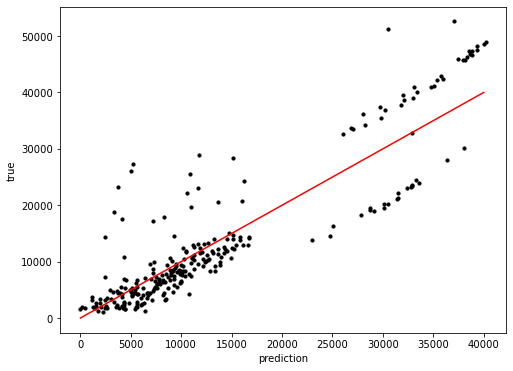

In [33]:
plt.figure(figsize=(8, 6))
ax = plt.axes()
ax.scatter(y_pred, y_test, color ='black', s=10)
ax.plot([1, 2, 4, 40000], [1, 2, 4, 40000], 'r-')
ax.set_xlabel('prediction')
ax.set_ylabel('true')
plt.show()

- The plot demonstrates a good fit between the predicted and true values.